# Logistic Regression Assumptions

- Explaining each assumption with Python implementation examples
- Using the Titanic dataset as the toy dataset in this example

### To continue
- Export df_main to data folder
- Import data into R notebook to run Box-Tidwell (R kernel)

### Contents
[**Initial Setup**](#initial-setup)  

[**Assumption 1** - Independence of Observations](#assumption1)  

[**Assumption 2** - Linearity of independent variables and log odds](#assumption2)  

[**Assumption 3** - Absence of multicollinearity](#assumption3)  

[**Assumption 4** - No strongly influential (extreme) outliers](#assumption4)  

[**Assumption 5** - Sufficiently large sample size](#assumption5)  

[**Assumption 6** - Appropriate Outcome Type](#assumption6)  
___

<a name='initial-setup'></a>
### Initial Setup
- Import and pre-process Titanic dataset (suitable example as it is a classification problem)
- Can ignore the details of this segment, as the objective here is just to prepare a dataset for the subsequent assumptions testing
- Reference: https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [3]:
# Import Titanic dataset (train.csv)
df_raw = pd.read_csv('data/train.csv')

# Create categorical variable for traveling alone
df_raw['TravelAlone'] = np.where((df_raw["SibSp"]+df_raw["Parch"])>0, 0, 1).astype('uint8')
df_raw.drop('SibSp', axis=1, inplace=True)
df_raw.drop('Parch', axis=1, inplace=True)

# Create categorical variables and drop some variables
df_main = pd.get_dummies(df_raw, columns=["Pclass","Embarked","Sex"], 
#                          drop_first=True
                        )

df_main.drop('Sex_female', axis=1, inplace=True)
df_main.drop('PassengerId', axis=1, inplace=True)
df_main.drop('Name', axis=1, inplace=True)
df_main.drop('Ticket', axis=1, inplace=True)
df_main.drop('Cabin', axis=1, inplace=True)

# Fill NaN (median imputation)
df_main["Age"].fillna(df_main["Age"].median(skipna=True), inplace=True)
df_main["Fare"].fillna(df_main["Fare"].median(skipna=True), inplace=True)

df_main.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


___
<a name='assumption1'></a>
### Assumption 1 - Independence of observations

___
<a name='assumption2'></a>
### Assumption 2 - Linearity of independent variables and log odds

- Details on how to setup R kernel: https://dzone.com/articles/using-r-on-jupyternbspnotebook
- Ideal method is to use the Box-Tidwell transformation test to test the linearity in the logit assumption for logistic regression
- rpy2 does NOT work on Windows (only MacOS and Linux)

In [6]:
# Export processed df_main for separate R notebook
df_main_2 = df_main.drop(columns=['Pclass_1', 'Embarked_C', 'Fare'])
df_main_2.to_csv('data/train_processed.csv', index=False)

From this point, please refer to the `Box-Tidwell-Test.ipynb` notebook for the assumption testing

___
<a name='assumption3'></a>
### Assumption 3 - Absence of multicollinearity

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

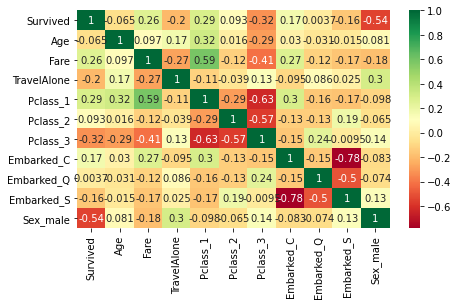

In [26]:
corrMatrix = df_main.corr()
plt.subplots(figsize=(7, 4))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

- Correlation matrix can be difficult to interpret when there are many independent variables. As such, we can use Variance Inflation Factor (VIF) instead

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [28]:
calc_vif(df_main)

<IPython.core.display.Javascript object>

,variables,VIF
0,Survived,1.636129
1,Age,1.247705
2,Fare,1.690089
3,TravelAlone,1.223353
4,Pclass_1,117.152079
5,Pclass_2,99.102382
6,Pclass_3,260.025558
7,Embarked_C,69.936806
8,Embarked_Q,36.792002
9,Embarked_S,91.326578


- The threshold for VIF is usually 5 (i.e. values above 5 means there is presence of multicollinearity)
- From the above, we can see that there is indeed presence of multicollinearity for the passenger class (Pclass) and embarked port (Embarked).
- This happens because we did not drop at least one of these values for these features when we ran 'get_dummies'
- We can easily resolve this multicollinearity issue by removing one of the categorical values of these features

In [29]:
df_main_2 = df_main.drop(columns=['Pclass_1', 'Embarked_C'])
calc_vif(df_main_2)

<IPython.core.display.Javascript object>

,variables,VIF
0,Survived,1.944148
1,Age,5.005814
2,Fare,1.793238
3,TravelAlone,3.030957
4,Pclass_2,1.968630
5,Pclass_3,3.524367
6,Embarked_Q,1.591633
7,Embarked_S,4.795192
8,Sex_male,3.708845


- Now we see that the VIF for all the remaining columns are =<5, meaning that the assumption of no multicollinearity is met.

___
<a name='assumption4'></a>
### Assumption 4 - No strongly influential (extreme) outliers

In [ ]:
# https://www.statology.org/cooks-distance-python/
# https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.html

In [ ]:
# Narrow down to continuous independent variables
df_main_sm = df_main[['Survived', 'Age', 'Fare']]

___
<a name='assumption5'></a>
### Assumption 5 - Sufficiently large sample size

In [32]:
len(df_main)

891

In [51]:
for col in df_main.columns.to_list()[1:]:
    if df_main.dtypes[col] == 'uint8':
        print(df_main[col].value_counts())

1    537
0    354
Name: TravelAlone, dtype: int64
0    675
1    216
Name: Pclass_1, dtype: int64
0    707
1    184
Name: Pclass_2, dtype: int64
1    491
0    400
Name: Pclass_3, dtype: int64
0    723
1    168
Name: Embarked_C, dtype: int64
0    814
1     77
Name: Embarked_Q, dtype: int64
1    644
0    247
Name: Embarked_S, dtype: int64
1    577
0    314
Name: Sex_male, dtype: int64


- Rule of thumb is to have at least 10-20 instances of the least frequent outcome for each predictor variable in your model
- From the value counts of the one-hot variables, we can see that this assumption is indeed satisfied
- Overall, we have 891 observations, which is a decent dataset size to work with

___
<a name='assumption6'></a>
### Assumption 6 - Appropriate outcome type

In [31]:
df_main['Survived'].nunique()

2

In [30]:
df_main['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

- There are only two outcomes (i.e. binary classification of survived or did not survive), so we will be using Binary Logistic Regression (which is the default method we normally use)
- Other types of Logistic Regression (where outcomes > 2) include:
    - Multinomial Logistic Regression: Target variable has three or more nominal categories such as predicting the type of Wine
    - Ordinal Logistic Regression: Target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.
- More info: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python